# Libraries

In [23]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Preprocessing data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
testset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


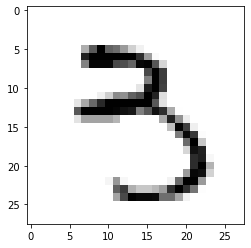

In [5]:
plt.imshow(images[63].numpy().squeeze(), cmap='gray_r')

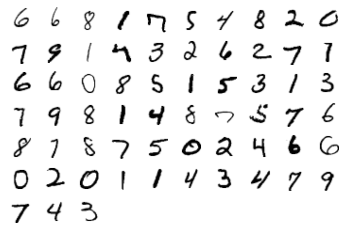

In [6]:
figure = plt.figure()
num_of_images = 63
for index in range(1, num_of_images + 1):
    plt.subplot(7, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
# класс нейронной сети
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Линейная функция -скрытый слой
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Нелинейная функция активации
        self.sigmoid = nn.Sigmoid()
        # Линейная функция -выходной слой
        self.fc2 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        # первый слой
        out = self.fc1(x)
        out = self.sigmoid(out)
        # выходной слой
        out = self.fc2(out)
        return out

In [8]:
input_size = 784 #размер входного изображения
hidden_sizes = 128 #количество нейронов скрытого слоя
output_size = 10 #количество нейронов выходного слоя

#создаем обьект нейронной сети
model = FeedforwardNeuralNetModel(input_size, hidden_sizes, output_size)

# model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[0], hidden_sizes[1]),
#                       nn.ReLU(),
#                       nn.Linear(hidden_sizes[1], output_size),
#                       nn.LogSoftmax(dim=1))
print(model)

learning_rate = 0.1 #шаг обучения
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # оптимизатор
criterion = nn.CrossEntropyLoss() #Loss function -- функция потерь

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [9]:
print(len(list(model.parameters())))
# Веса скрытого слоя
print(list(model.parameters())[0].size())
# Смещения скрытого слоя
print(list(model.parameters())[1].size())
# Веса выходного слоя
print(list(model.parameters())[2].size())
# Смещения выходного слоя
print(list(model.parameters())[3].size())

4
torch.Size([128, 784])
torch.Size([128])
torch.Size([10, 128])
torch.Size([10])


# Training model

In [18]:
#процесс обучения НС
iter = 0
batch_size = 64 #размер пачки
n_iters = 3000 #количество итераций
num_epochs = n_iters / (len(trainset) / batch_size)
num_epochs = int(num_epochs)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # считываем изоражения
        #print(images.size())
        images = images.view(-1, 28*28)#.requires_grad_()
        #print(images.size())

        # очистка градиентов предыдущей итераци
        optimizer.zero_grad()

        # вычисления выходного значения НС
        #print(images.size())
        #print(images[1,:])
        outputs = model(images)#!!!!!!!!!!!!!!!!!!!!!!
        #print(outputs.size())
        #print(outputs[1,:])

        # Вычисляем ошибку (Loss): softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Вычисляем градиенты для всех параметров (веса и смещения)
        loss.backward()

        # обновляем значения для всех параметров нс (веса и смещения)
        optimizer.step()

        iter += 1

        if iter % 200 == 0: #для каждого 200го шага вычисляем точность
            correct = 0
            total = 0
            # Итерация на тестовом наборе данных
            for images, labels in testloader:
                # считываем изоражения
                images = images.view(-1, 28*28).requires_grad_()

                # вычисления выходного значения НС
                outputs = model(images)
                #print(outputs.size())
                #print(outputs[2])

                # находим прогнозированной номер картинки
                _, predicted = torch.max(outputs.data, 1)
                #print(predicted[2])


                # общее количество образов
                total += labels.size(0)

                # количество корректно классифицированных образов
                correct += (predicted == labels).sum()

            # n-точность классификации
            accuracy = 100 * correct / total

            # Печатаем ошибку и точность
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 200. Loss: 0.08239834755659103. Accuracy: 95.76000213623047
Iteration: 400. Loss: 0.2653070092201233. Accuracy: 95.97000122070312
Iteration: 600. Loss: 0.15116968750953674. Accuracy: 96.04000091552734
Iteration: 800. Loss: 0.06679610162973404. Accuracy: 96.19000244140625
Iteration: 1000. Loss: 0.041623104363679886. Accuracy: 96.22000122070312
Iteration: 1200. Loss: 0.26411622762680054. Accuracy: 96.19000244140625
Iteration: 1400. Loss: 0.08928637206554413. Accuracy: 96.08000183105469
Iteration: 1600. Loss: 0.09296353906393051. Accuracy: 96.06999969482422
Iteration: 1800. Loss: 0.22899414598941803. Accuracy: 96.13999938964844
Iteration: 2000. Loss: 0.11383848637342453. Accuracy: 96.16000366210938
Iteration: 2200. Loss: 0.17535430192947388. Accuracy: 96.4000015258789
Iteration: 2400. Loss: 0.11176146566867828. Accuracy: 96.31999969482422
Iteration: 2600. Loss: 0.058080900460481644. Accuracy: 96.44999694824219
Iteration: 2800. Loss: 0.09588240087032318. Accuracy: 96.40000152587

In [19]:
torch.save(model, './my_mnist_model.pt') 

In [20]:
m = torch.load('./my_mnist_model.pt')

In [26]:
test_image_path = "./number.png"